# Bonus Track Assignment 2
## Covariance Rule

In [32]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
#1) Load dataset
uu = np.loadtxt("../dataset2_lab_2_1.csv", delimiter=",", unpack=True)
print(uu)
u = uu
for i in range (len(uu)):
    u[i] = uu[i]/np.linalg.norm(uu[i])
print(u)

[[  12.  3504. ]
 [  11.5 3693. ]
 [  11.  3436. ]
 [  12.  3433. ]
 [  10.5 3449. ]
 [  10.  4341. ]
 [   9.  4354. ]
 [   8.5 4312. ]
 [  10.  4425. ]
 [   8.5 3850. ]
 [  17.5 3090. ]
 [  11.5 4142. ]
 [  11.  4034. ]
 [  10.5 4166. ]
 [  11.  3850. ]
 [  10.  3563. ]
 [   8.  3609. ]
 [   8.  3353. ]
 [   9.5 3761. ]
 [  10.  3086. ]
 [  15.  2372. ]
 [  15.5 2833. ]
 [  15.5 2774. ]
 [  16.  2587. ]
 [  14.5 2130. ]
 [  20.5 1835. ]
 [  17.5 2672. ]
 [  14.5 2430. ]
 [  17.5 2375. ]
 [  12.5 2234. ]
 [  15.  2648. ]
 [  14.  4615. ]
 [  15.  4376. ]
 [  13.5 4382. ]
 [  18.5 4732. ]
 [  14.5 2130. ]
 [  15.5 2264. ]
 [  14.  2228. ]
 [  19.  2046. ]
 [  20.  1978. ]
 [  13.  2634. ]
 [  15.5 3439. ]
 [  15.5 3329. ]
 [  15.5 3302. ]
 [  15.5 3288. ]
 [  12.  4209. ]
 [  11.5 4464. ]
 [  13.5 4154. ]
 [  13.  4096. ]
 [  11.5 4955. ]
 [  12.  4746. ]
 [  12.  5140. ]
 [  13.5 2962. ]
 [  19.  2408. ]
 [  15.  3282. ]
 [  14.5 3139. ]
 [  14.  2220. ]
 [  14.  2123. ]
 [  19.5 2074.

In [34]:
#2) Implement a linear firing rate model
def linear_model(u,w):
    return np.dot(u,w)

In [35]:
#Implement Covariance Rule
name = 'Covariance Rule'
#randomly initialized wheight vector, from a uniform distribution [-1,1]
w = np.random.rand(2)*2 - 1 

#parameters
eta = 0.01
threshold = 1e-3
epochs = 1000
theta_v = 30

#to keep track of evolution of w during training
w_hist = w
wold = w

for N in range (epochs):


    if N % (epochs/10) == 0:
        print(f"Epoch {N} of {epochs}")

    #shuffle the input dataset
    uu = np.random.permutation(u)  

    for i in range (len(uu)):
        #Compute output
        v = linear_model(uu[i], w)
        #Covariance rule
        w = w + eta*(v-theta_v)*uu[i]

        w_hist = np.vstack((w_hist, w))
    
    #stop learning if w stabilizes
    if np.linalg.norm(w-wold) < threshold:
        print(f"Stopped at epoch {N} because of w convergence")
        break
    #to prevent overflow:
    if np.linalg.norm(w) > 1e50:
       print(f"Stopped at epoch {N} to prevent overflow")
       break
    wold = w

print('Training finished')

Epoch 0 of 1000
Stopped at epoch 27 to prevent overflow
Training finished


11369
11369


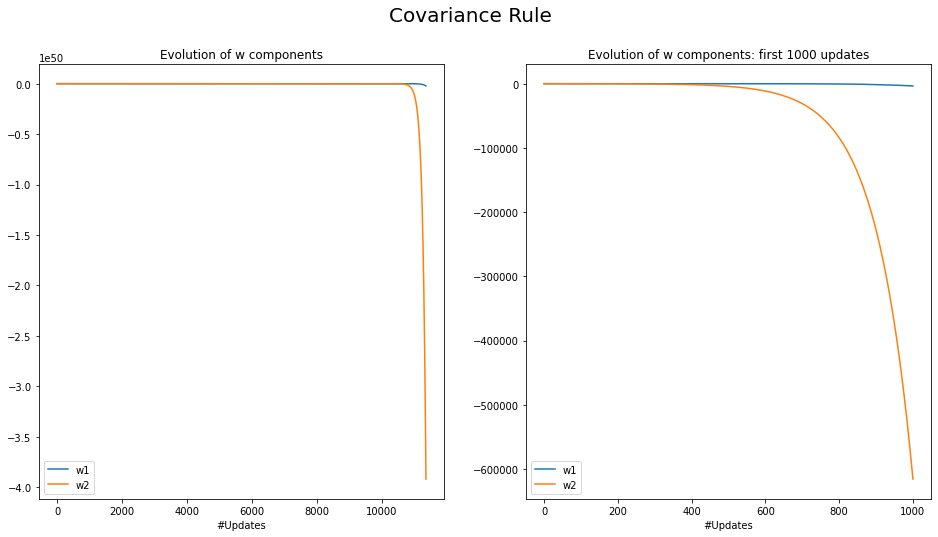

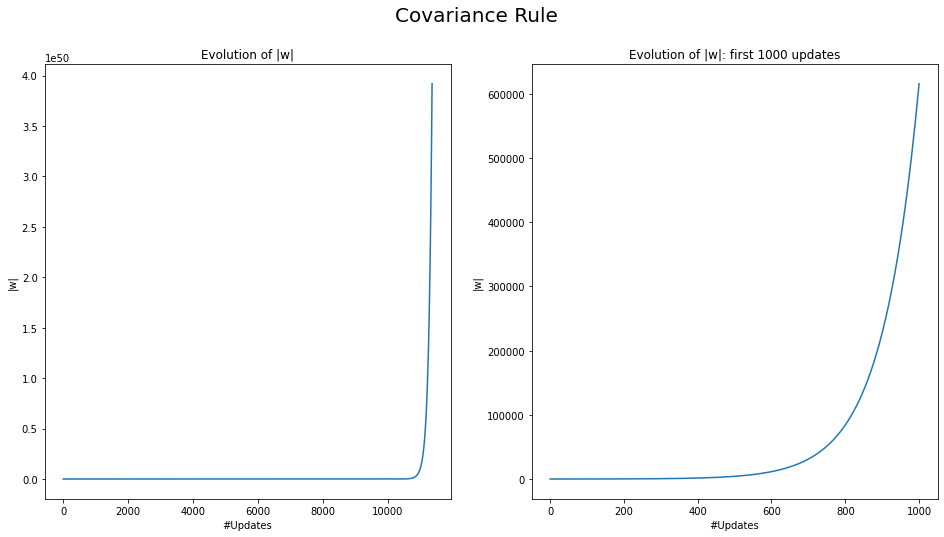

In [36]:
#plot P2
w1 = (np.transpose(w_hist))[0]
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))

plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)

ax1 = plt.subplot(1,2,1)
plt.title('Evolution of w components')
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
ax1.set_xlabel('#Updates')
plt.legend()

ax2 = plt.subplot(1,2,2)
xmax = min(1000,len(t))
plt.title(f'Evolution of w components: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w1[mask], label='w1')
plt.plot(t[mask], w2[mask], label='w2')
plt.legend()
ax2.set_xlabel('#Updates')

plt.savefig('P2' + name + '_w_evolution',format='pdf')


plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)
ax1 = plt.subplot(1,2,1)
plt.title('Evolution of |w|')
ax1.set_ylabel('|w|')
ax1.set_xlabel('#Updates')
plt.plot(t, w_norm)



print(len(w_norm))
print(len(t))
ax2 = plt.subplot(1,2,2)
xmax = min(1000,len(t))
plt.title(f'Evolution of |w|: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w_norm[mask])
ax2.set_ylabel('|w|')
ax2.set_xlabel('#Updates')

plt.savefig('P2' + name + '_w_norm_evolution',format='pdf')


plt.show()

In [37]:
#Compute correlation matrix
Q = np.array([[0,0], [0,0]])
for i in range (len(u)):
     Q = Q + np.outer(u[i],u[i])
Q = Q/len(u)

print('Correlation matrix:\n',Q)

#Compute eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(Q)

#Principal eigenvector
max_eigvect = eig_vec[:,np.argmax(eig_val)]
print('\nMax eigvect:\n',max_eigvect)

Correlation matrix:
 [[3.75413213e-05 5.74194948e-03]
 [5.74194948e-03 9.99962459e-01]]

Max eigvect:
 [-0.0057421  -0.99998351]


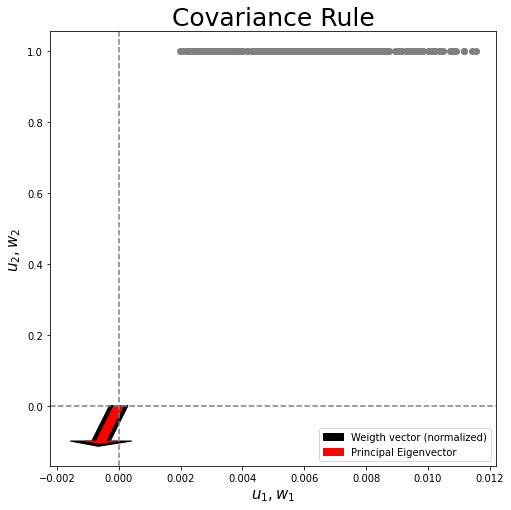

In [38]:
#P1
plt.figure(figsize=(8, 8))
plt.title(name, fontsize = 25)
#plot x,y axis
plt.axhline(y=0, color='grey', linestyle = '--')
plt.axvline(x=0, color='grey', linestyle = '--')

#plot inputs
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]
plt.scatter(u1,u2, color= 'grey')

#normalized weigth vector
plt.arrow(0,0, 0.1*w[0]/np.linalg.norm(w), 0.1*w[1]/np.linalg.norm(w) , width=0.0006, head_width=0.002, head_length=0.015, label='Weigth vector (normalized)', color = 'black')

#principal eigenvector
plt.arrow(0,0, 0.1*max_eigvect[0], 0.1*max_eigvect[1] , width=0.0003, head_width=0.001, head_length=0.006, label='Principal Eigenvector', color = 'red')
plt.xlabel('$u_1, w_1$', fontsize=15)
plt.ylabel('$u_2, w_2$', fontsize=15)
plt.legend()

plt.savefig('P1' + name,format='pdf')
plt.show()

We see, as espected, that the final weight vector is parallel to the principal eigenvector of the correlation matrix.